In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import seaborn as sns
import sklearn
import imblearn
import matplotlib.pyplot as plt
import time
import sklearn.metrics as m
import xgboost as xgb
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [9]:
# read the data
data_target = pd.read_csv('../datasets/target_model/CICIDS2017/df_target_0311.csv')
data_substitute = pd.read_csv('../datasets/substitute_model/CICIDS2017/df_substitute_0311.csv')
data = pd.concat([data_target, data_substitute], axis=0)
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,...,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Binary_class,attack_type
0,80,5435785,4,0,24,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,4.415186,0.735864,1.811928e+06,3.137528e+06,5434833,3,5435785,1.811928e+06,3.137528e+06,5434833,3,0,0.00000,0.000000e+00,0,0,0,0,0,0,80,0,0.735864,0.000000,6,6,...,0.000000,0.000000e+00,0,0,0,0,1,0,0,0,0,7.500000,6.000000,0.000000,80,0,0,0,0,0,0,4,24,0,0,256,-1,3,20,952.0,0.0,952,952,5434833.0,0.0,5434833,5434833,DDoS,malicious,DOS
1,6668,26,1,1,2,6,2,2,2.000000,0.000000,6,6,6.000000,0.000000,307692.307700,76923.076920,2.600000e+01,0.000000e+00,26,26,0,0.000000e+00,0.000000e+00,0,0,0,0.00000,0.000000e+00,0,0,0,0,0,0,24,20,38461.538460,38461.538460,2,6,...,2.309401,5.333333e+00,0,0,0,1,0,0,0,0,1,5.000000,2.000000,6.000000,24,0,0,0,0,0,0,1,2,1,6,1024,0,0,24,0.0,0.0,0,0,0.0,0.0,0,0,PortScan,malicious,PortScan
2,53,23475,1,1,70,152,70,70,70.000000,0.000000,152,152,152.000000,0.000000,9456.869010,85.197018,2.347500e+04,0.000000e+00,23475,23475,0,0.000000e+00,0.000000e+00,0,0,0,0.00000,0.000000e+00,0,0,0,0,0,0,20,20,42.598509,42.598509,70,152,...,47.342722,2.241333e+03,0,0,0,0,0,0,0,0,1,146.000000,70.000000,152.000000,20,0,0,0,0,0,0,1,70,1,152,-1,-1,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,benign,benign
3,80,37553,2,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,53.258062,3.755300e+04,0.000000e+00,37553,37553,37553,3.755300e+04,0.000000e+00,37553,37553,0,0.00000,0.000000e+00,0,0,0,0,0,0,64,0,53.258062,0.000000,0,0,...,0.000000,0.000000e+00,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.000000,64,0,0,0,0,0,0,2,0,0,0,242,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,benign,benign
4,53,71220,4,4,172,384,43,43,43.000000,0.000000,96,96,96.000000,0.000000,7806.795844,112.327998,1.017429e+04,1.858004e+04,47213,3,71042,2.368067e+04,4.100140e+04,71025,3,47409,15803.00000,2.736554e+04,47402,3,0,0,0,0,80,80,56.163999,56.163999,43,96,...,27.933453,7.802778e+02,0,0,0,0,0,0,0,0,1,74.875000,43.000000,96.000000,80,0,0,0,0,0,0,4,172,4,384,-1,-1,3,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,benign,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261180,53,23712,2,2,82,190,41,41,41.000000,0.000000,95,95,95.000000,0.000000,11470.985160,168.690958,7.904000e+03,1.368407e+04,23705,3,4,4.000000e+00,0.000000e+00,4,4,3,3.00000,0.000000e+00,3,3,0,0,0,0,40,40,84.345479,84.345479,41,95,...,29.577018,8.748000e+02,0,0,0,0,0,0,0,0,1,78.250000,41.000000,95.000000,40,0,0,0,0,0,0,2,82,2,190,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,benign,benig

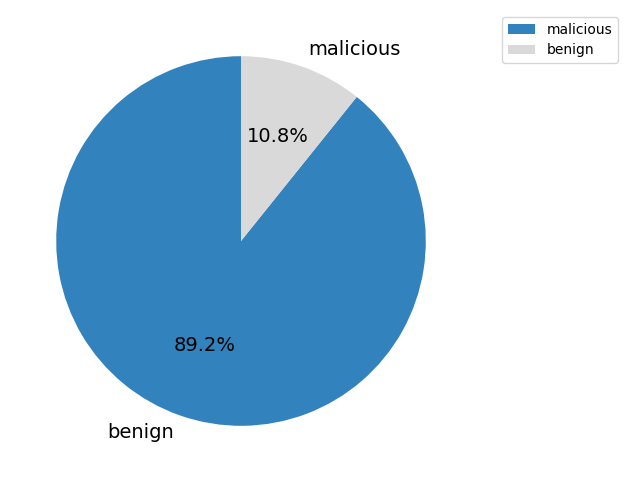

In [12]:
# draw the fig pie plot of data distribution
fig, ax = plt.subplots()
# plot with values
data['Binary_class'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, legend = True, fontsize=14, figsize=(10, 6), ax=ax, colormap='tab20c')
plt.legend(data['Binary_class'].unique(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('')
plt.ylabel('')
plt.show()

In [14]:
df_malicious = data[data['Binary_class'] == "malicious"]
df_malicious

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,...,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Binary_class,attack_type
0,80,5435785,4,0,24,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,4.415186,0.735864,1.811928e+06,3.137528e+06,5434833,3,5435785,1.811928e+06,3.137528e+06,5434833,3,0,0.0000,0.000000e+00,0,0,0,0,0,0,80,0,0.735864,0.000000,6,6,...,0.000000,0.000000e+00,0,0,0,0,1,0,0,0,0,7.500000,6.000000,0.000000,80,0,0,0,0,0,0,4,24,0,0,256,-1,3,20,952.0,0.0,952,952,5434833.0,0.0,5434833,5434833,DDoS,malicious,DOS
1,6668,26,1,1,2,6,2,2,2.000000,0.000000,6,6,6.000000,0.000000,307692.307700,76923.076920,2.600000e+01,0.000000e+00,26,26,0,0.000000e+00,0.000000e+00,0,0,0,0.0000,0.000000e+00,0,0,0,0,0,0,24,20,38461.538460,38461.538460,2,6,...,2.309401,5.333333e+00,0,0,0,1,0,0,0,0,1,5.000000,2.000000,6.000000,24,0,0,0,0,0,0,1,2,1,6,1024,0,0,24,0.0,0.0,0,0,0.0,0.0,0,0,PortScan,malicious,PortScan
8,80,11482678,4,0,24,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,2.090105,0.348351,3.827559e+06,6.629074e+06,11500000,192,11500000,3.827559e+06,6.629074e+06,11500000,192,0,0.0000,0.000000e+00,0,0,0,0,0,0,80,0,0.348351,0.000000,6,6,...,0.000000,0.000000e+00,0,0,0,0,1,0,0,0,0,7.500000,6.000000,0.000000,80,0,0,0,0,0,0,4,24,0,0,256,-1,3,20,523.0,0.0,523,523,11500000.0,0.0,11500000,11500000,DDoS,malicious,DOS
9,80,89198026,8,5,56,11601,20,0,7.000000,5.656854,8760,0,2320.200000,3668.897000,130.686749,0.145743,7.433169e+06,2.230000e+07,77300000,48,89200000,1.270000e+07,2.880000e+07,77300000,250,45833,11458.2500,1.316219e+04,24522,48,0,0,0,0,172,112,0.089688,0.056055,0,8760,...,2337.724089,5.464954e+06,0,0,0,0,1,0,0,0,0,897.153846,7.000000,2320.200000,172,0,0,0,0,0,0,8,56,5,11601,256,229,6,20,1458.0,0.0,1458,1458,44600000.0,46300000.0,77300000,11800000,DDoS,malicious,DOS
14,80,1420005,4,0,24,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,16.901349,2.816891,4.733350e+05,8.189709e+05,1419001,4,1420005,4.733350e+05,8.189709e+05,1419001,4,0,0.0000,0.000000e+00,0,0,0,0,0,0,80,0,2.816891,0.000000,6,6,...,0.000000,0.000000e+00,0,0,0,0,1,0,0,0,0,7.500000,6.000000,0.000000,80,0,0,0,0,0,0,4,24,0,0,256,-1,3,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS,malicious,DOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261140,80,62882,3,4,26,11601,20,0,8.666667,10.263203,8675,0,2900.250000,4088.041942,184901.879700,111.319615,1.048033e+04,2.363228e+04,58641,50,4004,2.002000e+03,2.329210e+03,3649,355,62769,20923.0000,3.271863e+04,58641,187,0,0,0,0,72,92,47.708406,63.611208,0,8675,...,3091.095642,9.554872e+06,0,0,0,1,0,0,0,0,1,166

In [20]:
# Replace weird characters
label_names = df_malicious[' Label'].unique()

import re
label_names = [re.sub("[^a-zA-Z ]+", "", l) for l in label_names]
label_names = [re.sub("[\s\s]", '_', l) for l in label_names]
label_names = [lab.replace("__", "_") for lab in label_names]
label_names, len(label_names)

# Replacing 'Label' column values with new readable values.
labels = df_malicious[' Label'].unique()
for i in range(0,len(label_names)):
    df_malicious[' Label'] = df_malicious[' Label'].replace({labels[i] : label_names[i]})
    
df_malicious[' Label'].unique()

array(['DDoS', 'PortScan', 'DoS_slowloris', 'SSHPatator',
       'DoS_Slowhttptest', 'FTPPatator', 'DoS_GoldenEye', 'Infiltration',
       'Bot', 'Web_Attack_Brute_Force', 'Web_Attack_XSS', 'Heartbleed',
       'Web_Attack_Sql_Injection'], dtype=object)

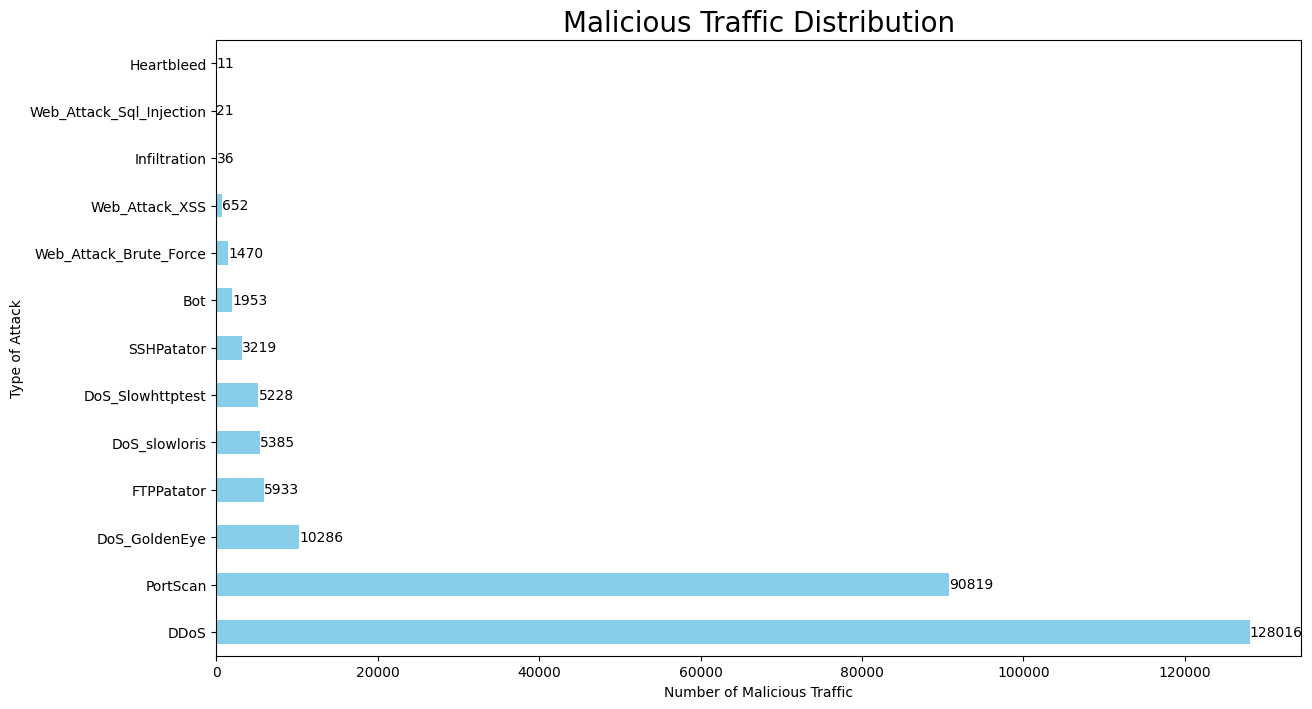

In [31]:
# draw the fig bar plot of data distribution
fig, ax = plt.subplots()
# plot with values
df_malicious[' Label'].value_counts().plot(kind='barh', ax=ax, color='skyblue', figsize=(14, 8))
plt.bar_label(ax.containers[0])
plt.title('Malicious Traffic Distribution', fontsize=20)
plt.ylabel('Type of Attack')
plt.xlabel('Number of Malicious Traffic')
plt.show()
